In [1]:
from common.utils import *
import os.path as osp
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
def plot_weight_dist(model):
    to_be_plotted = []

    num_blocks = [3,4,6,3]
    for layer in range(1,5):
        for block in range(0,num_blocks[layer-1]):
            conv = model._modules['layer'+str(layer)][block]._modules['conv2'].weight.data.numpy()
            to_be_plotted.append(conv)
    
    plt.violinplot(to_be_plotted)
def plot_weight_hist(model):
    
    fig, axs = plt.subplots(4, 4,sharey=True, tight_layout=True)
    num_blocks = [3,4,6,3]
    i = 0
    j = 0
    for layer in range(1,5):
        
        for block in range(0,num_blocks[layer-1]):
            conv = model._modules['layer'+str(layer)][block]._modules['conv2'].weight.data.numpy().flatten()
            weights = np.ones_like(conv)/float(len(conv))
            axs[i,j].hist(conv,50,weights=weights)
            axs[i,j].yaxis.set_major_formatter(PercentFormatter(xmax=1))
            axs[i,j].set_title('L '+str(layer)+', B '+str(block))
            #print(i,j)
            if j == 3:
                j = -1
                i += 1
            j += 1
            
    plt.subplots_adjust(wspace=1,hspace=0.5)


In [3]:
weights_name = {
            -2:'7Scenes_heads_mapnet_mapnet_learn_beta_learn_gamma/epoch_250.pth.tar',
            -1: '7Scenes_chess_mapnet_mapnet_learn_beta_learn_gamma/epoch_250.pth.tar',
            0:'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_baseline.pth.tar',
            4: 'AachenDayNight__mapnet_stylized_4_styles_seed0.pth.tar',
            8:'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_stylized_8_styles_seed0.pth.tar',
            16: 'AachenDayNight__mapnet_mapnet_learn_beta_learn_gamma_stylized_16_styles_seed0.pth.tar'}   
style = -1
weights_dir = osp.join('scripts/logs',weights_name[style])
model = get_model(weights_dir)
torch.save(model,'../NetDissect-Lite/restnet34_7scenes_heads.pth.tar')

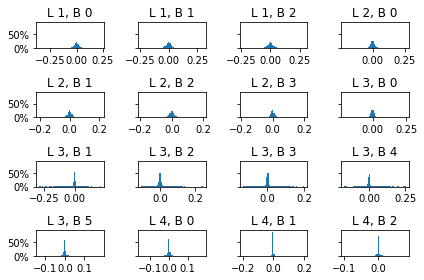

In [5]:
style = -2
weights_dir = osp.join('scripts/logs',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

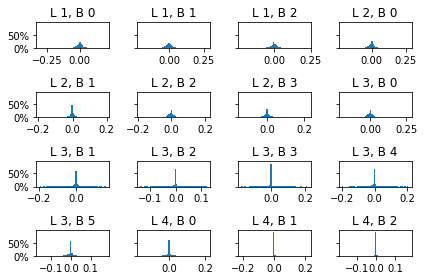

In [6]:
style = -1
weights_dir = osp.join('scripts/logs',weights_name[style])
model = get_model(weights_dir)
plot_weight_hist(model)

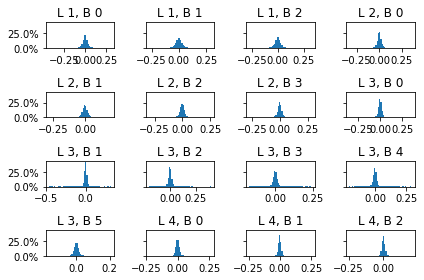

In [4]:
from torchvision import models
style = 16
weights_dir = osp.join('scripts/logs/stylized_models',weights_name[style])
model = get_model(weights_dir)
model = models.resnet34(pretrained=True)
plot_weight_hist(model)